# SUPPORT 2
Dataset Information
For what purpose was the dataset created?

To develop and validate a prognostic model that estimates survival over a 180-day period for seriously ill hospitalized adults (phase I of SUPPORT) and to compare this model's predictions with those of an existing prognostic system and with physicians' independent estimates (SUPPORT phase II).

What do the instances in this dataset represent?

The instances represent records of critically ill patients admitted to United States hospitals with advanced stages of serious illness.

Are there recommended data splits?

No recommendation, standard train-test split could be used. Can use three-way holdout split (i.e., train-validation-test) when doing model selection.

Does the dataset contain data that might be considered sensitive in any way?

Yes. There is information about race, gender, income, and education level.

Was there any data preprocessing performed?

No.  Due to the high percentage of missing values, there are a couple of recommended imputation values:
According to the HBiostat Repository (https://hbiostat.org/data/repo/supportdesc, Professor Frank Harrell) the following default values have been found to be useful in imputing missing baseline physiologic data:
Baseline Variable	Normal Fill-in Value
- Serum albumin (alb)	3.5
- PaO2/FiO2 ratio (pafi) 	333.3
- Bilirubin (bili)	1.01
- Creatinine (crea)	1.01
- bun	6.51
- White blood count (wblc)	9 (thousands)
- Urine output (urine)	2502
There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.

### Importing Packages

In [27]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

### Importing Dataset

In [2]:
# fetch dataset 
support2 = fetch_ucirepo(id=880) 
  
# data (as pandas dataframes) 
X = support2.data.features 
y = support2.data.targets 

## Exploratory Data Analysis
- Converting Features and Labels into DataFrame
- Information about features
- Information about label
- Nunique values for target variable
- Values count of target variable
- Checking object columns in Features and Labels
- Correlations of Features and Labels
- Finding missing values for Features and labels

### Converting Features and Labels into DataFrame

In [3]:
X = pd.DataFrame(data=X)
y = pd.DataFrame(data=y)
print(X.head())
print(y.head())

        age     sex            dzgroup             dzclass  num.co   edu  \
0  62.84998    male        Lung Cancer              Cancer       0  11.0   
1  60.33899  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
2  52.74698  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
3  42.38498  female        Lung Cancer              Cancer       2  11.0   
4  79.88495  female  ARF/MOSF w/Sepsis            ARF/MOSF       1   NaN   

       income  scoma  charges  totcst  ...      bili      crea    sod  \
0    $11-$25k    0.0   9715.0     NaN  ...  0.199982  1.199951  141.0   
1    $11-$25k   44.0  34496.0     NaN  ...       NaN  5.500000  132.0   
2  under $11k    0.0  41094.0     NaN  ...  2.199707  2.000000  134.0   
3  under $11k    0.0   3075.0     NaN  ...       NaN  0.799927  139.0   
4         NaN   26.0  50127.0     NaN  ...       NaN  0.799927  143.0   

         ph  glucose  bun  urine  adlp  adls  adlsc  
0  7.459961      NaN  NaN    NaN   7.0   7.0    7.

### Information about Features

In [4]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

### Information about Label

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   death     9105 non-null   int64 
 1   hospdead  9105 non-null   int64 
 2   sfdm2     7705 non-null   object
dtypes: int64(2), object(1)
memory usage: 213.5+ KB


### N-Unique values in Target Variables

In [6]:
y.nunique()

death       2
hospdead    2
sfdm2       5
dtype: int64

### Value counts in Target Variables

In [7]:
y.value_counts()

death  hospdead  sfdm2              
1      1         <2 mo. follow-up       2261
0      0         no(M2 and SIP pres)    1673
1      0         no(M2 and SIP pres)    1385
                 <2 mo. follow-up        862
                 adl>=4 (>=5 if sur)     506
0      0         adl>=4 (>=5 if sur)     358
1      0         SIP>=30                 292
0      0         SIP>=30                 268
1      1         adl>=4 (>=5 if sur)      52
       0         Coma or Intub            25
0      0         Coma or Intub             9
1      1         Coma or Intub             7
                 SIP>=30                   4
                 no(M2 and SIP pres)       3
dtype: int64

### Object columns in features

In [8]:
X_categorical = X.select_dtypes('object').columns
X_categorical

Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr'], dtype='object')

### Object colummns in Label

In [9]:
y_categorical = y.select_dtypes('object').columns
y_categorical

Index(['sfdm2'], dtype='object')

### Correlation between Features and labels

In [10]:
df_corr = pd.concat([X,pd.get_dummies(y)],axis=1).corr()
df_corr['death'].sort_values(ascending=False)

C:\Users\Dhrumil Patel\AppData\Local\Temp\ipykernel_11928\2214096009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = pd.concat([X,pd.get_dummies(y)],axis=1).corr()


death                        1.000000
sfdm2_<2 mo. follow-up       0.494459
hospdead                     0.404793
age                          0.179230
aps                          0.156866
sps                          0.156346
adlsc                        0.154760
adls                         0.146124
scoma                        0.135986
avtisst                      0.117293
adlp                         0.107614
num.co                       0.068634
hday                         0.063845
dementia                     0.044391
bili                         0.029658
crea                         0.026705
bun                          0.019307
sfdm2_Coma or Intub          0.014349
alb                          0.014215
diabetes                     0.011940
resp                         0.006331
glucose                      0.002928
pafi                         0.002258
edu                         -0.002943
hrt                         -0.003841
urine                       -0.004537
wblc        

In [11]:
print(y.head())

   death  hospdead                sfdm2
0      0         0                  NaN
1      1         1     <2 mo. follow-up
2      1         0     <2 mo. follow-up
3      1         0  no(M2 and SIP pres)
4      0         0  no(M2 and SIP pres)


### Finding Missing Values in Features and labels

In [12]:
X.isnull().sum()

age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
dtype: int64

In [13]:
y.isnull().sum()

death          0
hospdead       0
sfdm2       1400
dtype: int64

## Data Preprocessing
- Data Encoding
- Finding Missing Values
- Checking for the Outliers
- Removing Outliers (If applicable)
- Standardize the Data
- Initialize final Features and labels
- Train test split

### Data Encoding of Features

In [14]:
encoder = OrdinalEncoder()
X[X_categorical] = encoder.fit_transform(X[X_categorical])
y[y_categorical] = encoder.fit_transform(y[y_categorical])

### Checking for the outliers

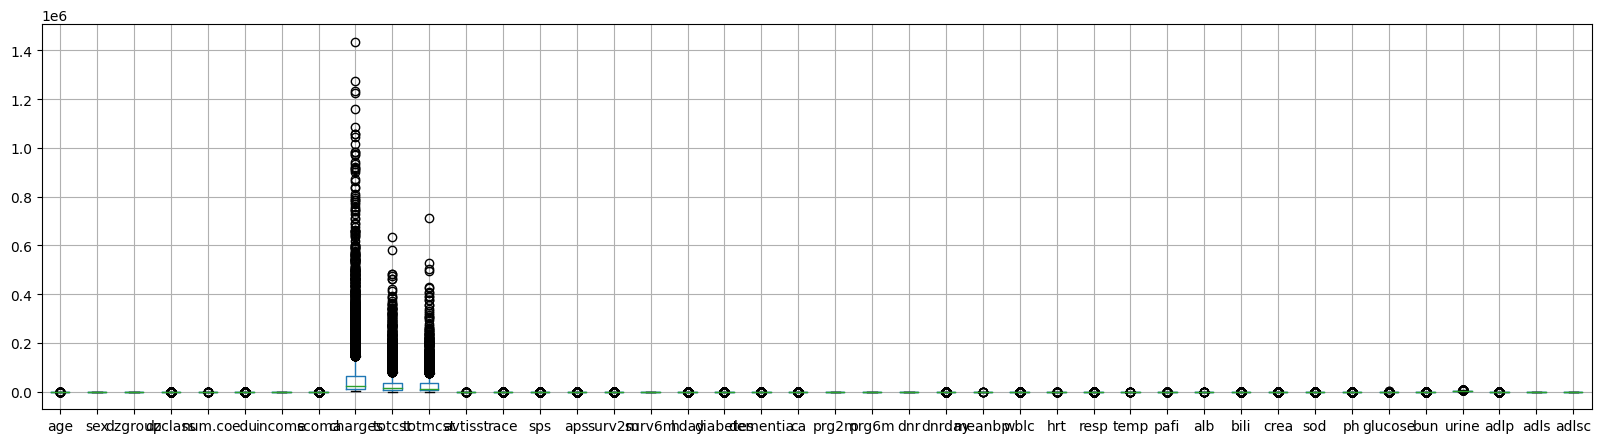

In [15]:
plt.figure(figsize=(20,5))
X.boxplot()
plt.show()

### Removing Outliers

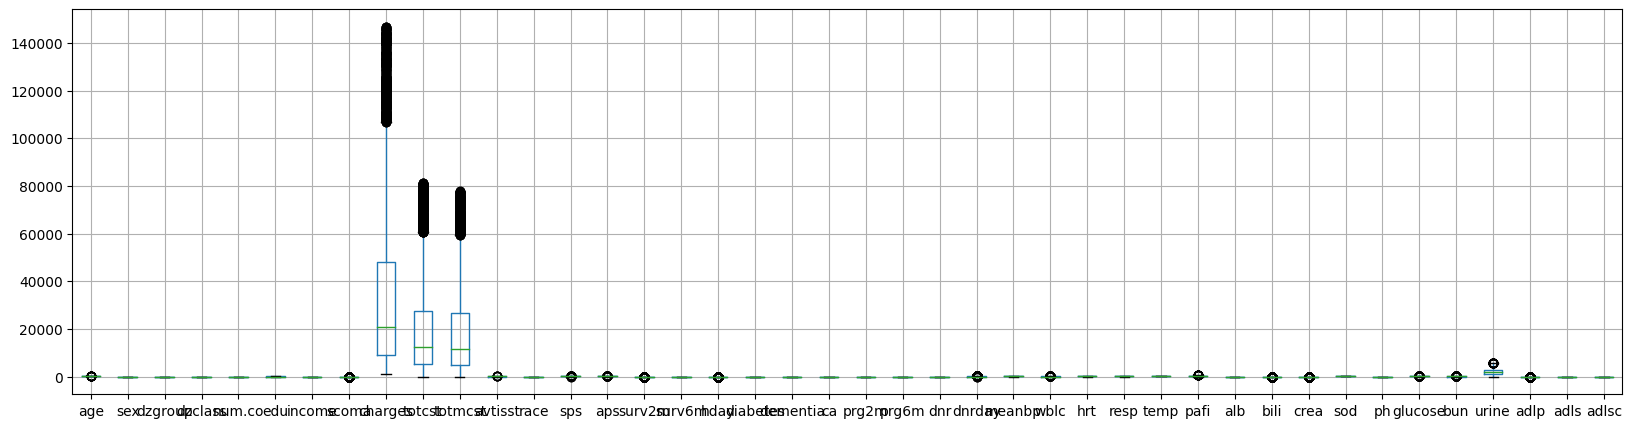

In [16]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_noOutliers = X[(X >= lower_bound) & (X <= upper_bound)]
plt.figure(figsize=(20,5))
X_noOutliers.boxplot()
plt.show()

### Finding Missing Values

In [17]:
imputer = SimpleImputer()
X_fillNaN = imputer.fit_transform(X_noOutliers)
y_fillNaN = imputer.fit_transform(y)

X_fillNaN = pd.DataFrame(X_fillNaN,columns=X.columns)
y_fillNaN = pd.DataFrame(y_fillNaN,columns=y.columns)

### Standardize the data

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fillNaN)

### Final Features and Labels

In [26]:
final_X = pd.DataFrame(X_scaled,columns=X.columns)
final_y = y_fillNaN.copy()
print(final_X.shape)
print(final_y.shape)


(9105, 42)
(9105, 3)


### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_X,final_y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)